In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(10,8)})

In [77]:
bnk_mrktg_raw =  pd.read_csv("/Users/vishnu/Downloads/bank/bank.csv",sep=';')

In [3]:
bnk_mrktg_raw.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
# Check for missing values in data set
bnk_mrktg_raw.isnull().any()
# There are no missing values.

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

<div class="span5 alert alert-info">

<p> <b> Input variables: </b> <br>
   ### bank client data: <br>

   1 - age (numeric)  <br>
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")  <br>
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed) <br>
   4 - education (categorical: "unknown","secondary","primary","tertiary") <br>
   5 - default: has credit in default? (binary: "yes","no") <br>
   6 - balance: average yearly balance, in euros (numeric)  <br>
   7 - housing: has housing loan? (binary: "yes","no")<br>
   8 - loan: has personal loan? (binary: "yes","no")<br>
   # related with the last contact of the current campaign: <br>
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") <br>
  10 - day: last contact day of the month (numeric)<br>
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")<br>
  12 - duration: last contact duration, in seconds (numeric)<br>
   # other attributes: <br>
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) <br>
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)<br>
  15 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")<br><br>

  <b> Output variable (desired target): </b> <br>
  17 - y - has the client subscribed a term deposit? (binary: "yes","no") <br>
</p>
</div>

In [5]:
# Identify all non integer parameters. 
bnk_mrktg_raw.dtypes[bnk_mrktg_raw.dtypes == 'object']

job          object
marital      object
education    object
default      object
housing      object
loan         object
contact      object
month        object
poutcome     object
y            object
dtype: object

In [78]:
print("all unique values for default %s" %bnk_mrktg_raw['default'].unique())
print("all unique values for loan %s" %bnk_mrktg_raw['loan'].unique())
print("all unique values for contact %s" %bnk_mrktg_raw['contact'].unique())
print("all unique values for month %s" %bnk_mrktg_raw['month'].unique())
print("all unique values for y %s" %bnk_mrktg_raw['y'].unique())

all unique values for default ['no' 'yes']
all unique values for loan ['no' 'yes']
all unique values for contact ['cellular' 'unknown' 'telephone']
all unique values for month ['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
all unique values for y ['no' 'yes']


In [96]:
# Convert string response varaible into numeric 
# 0 for No and 1 for yes
bnk_mrktg_raw.y.replace({'no': 0, 'yes':1}, inplace=True)

# Yes : 521
# No  : 4000

In [97]:
bnk_mrktg_raw.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
0,40.998000,1403.211750,15.948750,226.347500,2.862250,36.006000,0.471250
1,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211


In [98]:
bnk_mrktg_raw.y

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      1
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
4491    0
4492    0
4493    0
4494    1
4495    0
4496    0
4497    0
4498    0
4499    0
4500    0
4501    0
4502    0
4503    1
4504    1
4505    1
4506    0
4507    0
4508    0
4509    0
4510    0
4511    1
4512    0
4513    0
4514    0
4515    0
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: int64


### Observations from above result.

<p>
  <li> 1. Average age is higher for customers willing to open account.
  <li> 2. Longer the gap b/w previous contact more likly customer to open account.
  <li> 3. longer duration of last call has more odds of opening account.
  <li> 4. No of times customer received call.
</p>

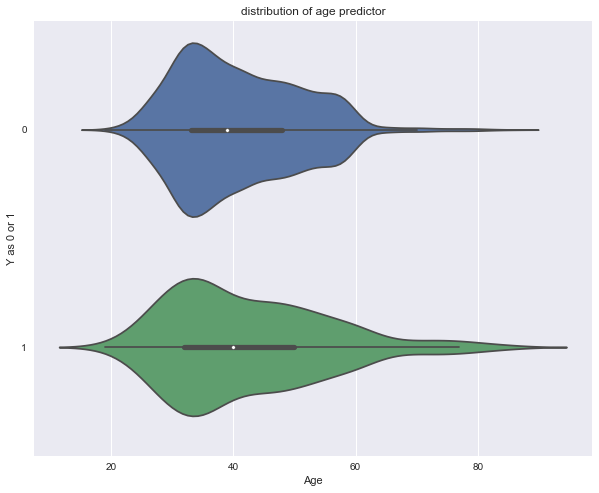

In [99]:
ax = sns.violinplot(y="y", x="age", data=bnk_mrktg_raw, orient='h')
plt.title('distribution of age predictor')
plt.ylabel('Y as 0 or 1')
plt.xlabel('Age')
plt.show()

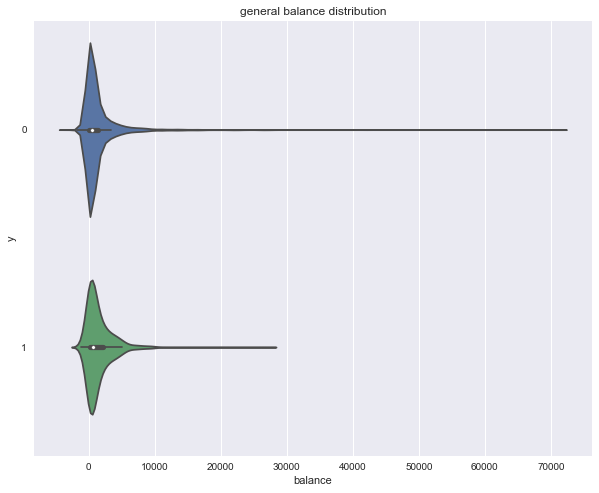

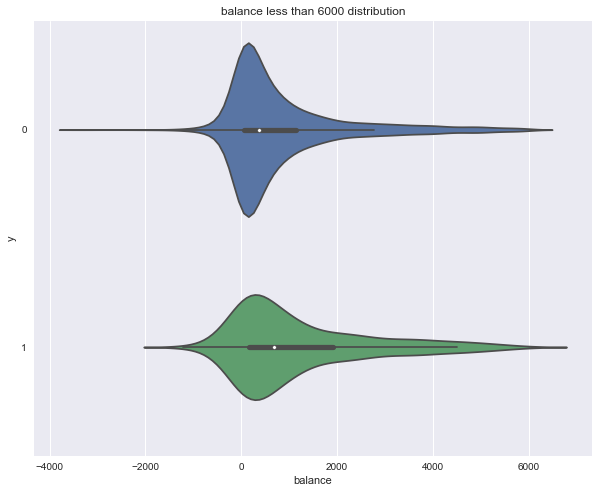

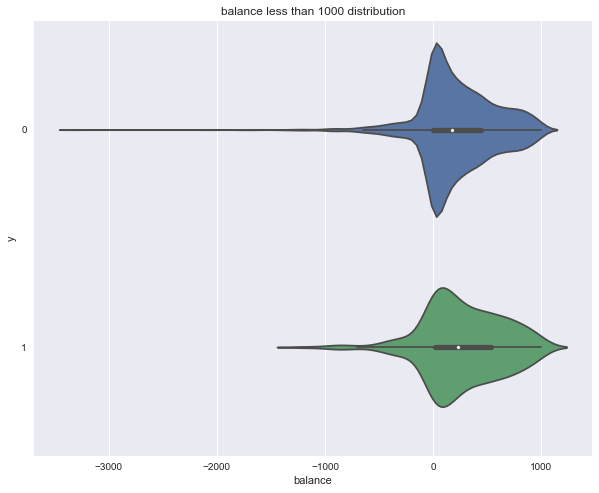

In [100]:

ax = sns.violinplot(y="y", x="balance", data=bnk_mrktg_raw, orient='h')
plt.title('general balance distribution')
plt.show()

# As violin balance plot at this level does not add any perspective.
bnk_mrktg_raw_filtered_lt_10k = bnk_mrktg_raw[bnk_mrktg_raw.balance <= 6000]
ax = sns.violinplot(y="y", x="balance", data=bnk_mrktg_raw_filtered_lt_10k, orient='h')
plt.title('balance less than 6000 distribution')
plt.show()


bnk_mrktg_raw_filtered_lt_10k = bnk_mrktg_raw[bnk_mrktg_raw.balance <= 1000]
ax = sns.violinplot(y="y", x="balance", data=bnk_mrktg_raw_filtered_lt_10k, orient='h')
plt.title('balance less than 1000 distribution')
plt.show()

<p> <b> As we can observe from plot if balance is less then -$1500 then user tend not to open account. </p>

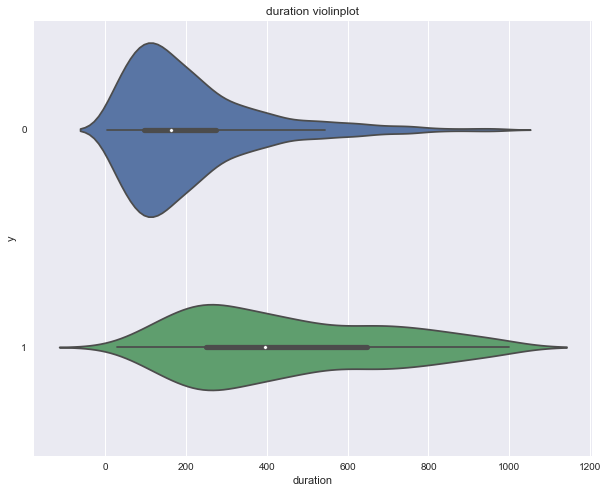

In [101]:
bnk_mrktg_raw_lt_1000 = bnk_mrktg_raw[bnk_mrktg_raw.duration < 1000]
ax = sns.violinplot(y="y", x="duration", data=bnk_mrktg_raw_lt_1000, orient='h')
plt.title('duration violinplot')
plt.show()

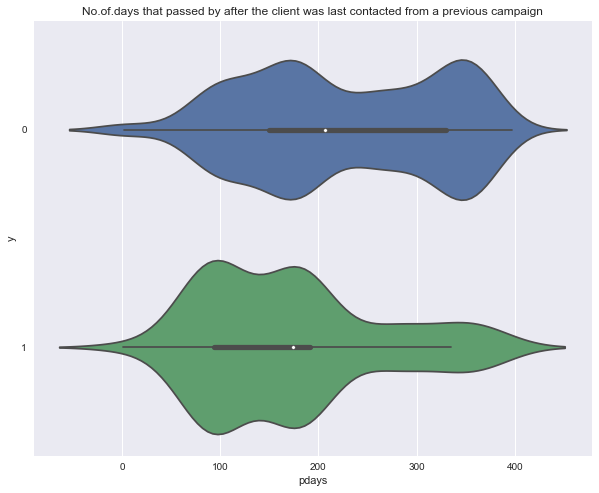

In [102]:
ax = sns.violinplot(y="y", x="pdays", data=bnk_mrktg_raw[(bnk_mrktg_raw.pdays < 400) & (bnk_mrktg_raw.pdays != -1)], orient='h')
plt.title('No.of.days that passed by after the client was last contacted from a previous campaign')
plt.show()

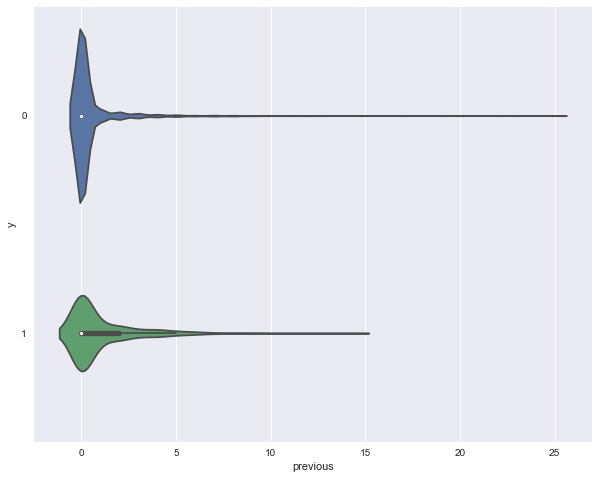

In [103]:
ax = sns.violinplot(y="y", x="previous", data=bnk_mrktg_raw, orient='h')
plt.show()

In [104]:
# All customers with pdays > 15 end up with not opening term deposits.
print("No of records with pdays > 15 are " %(bnk_mrktg_raw.pdays > 15).sum())

No of records with pdays > 15 are 


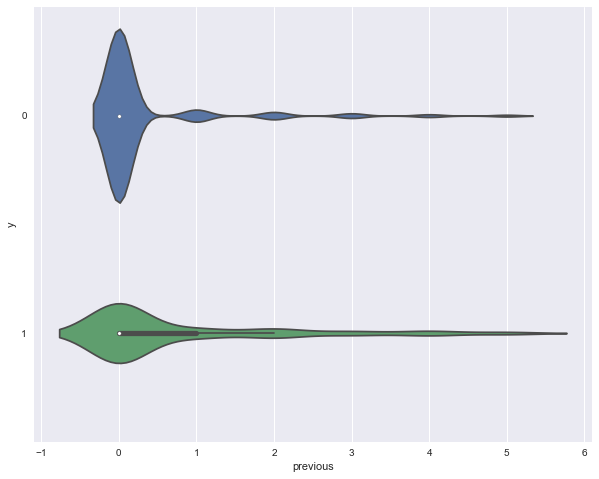

In [105]:
ax = sns.violinplot(y="y", x="previous", data=bnk_mrktg_raw[bnk_mrktg_raw.previous <= 5], orient='h')
plt.show()

In [106]:
bnk_mrktg_raw.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

<p> All objects with object types are categorical values i.e 9 out of 18.<p>

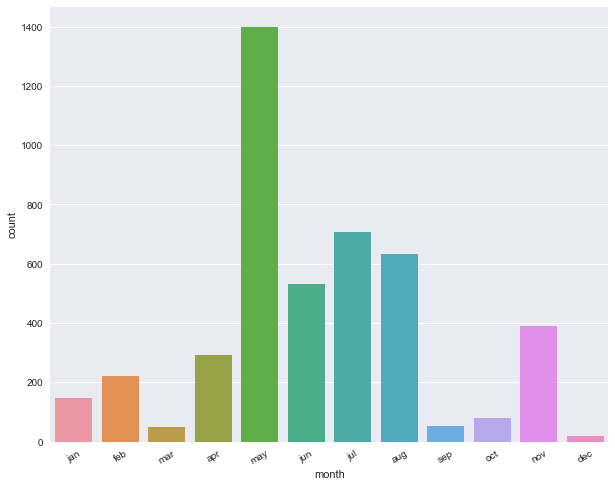

In [107]:
sns.countplot(x="month",data=bnk_mrktg_raw, order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
plt.rcParams["xtick.labelsize"] = 10
plt.xticks(rotation=30)
plt.show()

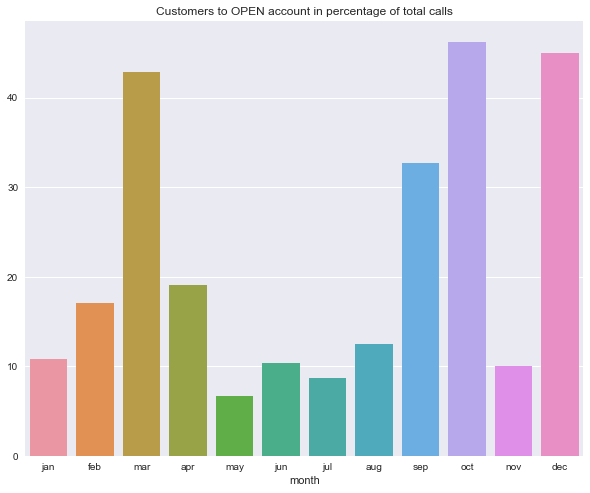

In [108]:
bnk_mrktg_raw_y_as_yes = bnk_mrktg_raw[bnk_mrktg_raw.y==1].groupby('month')['y'].count()
bnk_mrktg_raw_y_as_cnt = bnk_mrktg_raw.groupby('month')['y'].count()

mnth_prcnt_cnt = (bnk_mrktg_raw_y_as_yes/bnk_mrktg_raw_y_as_cnt) * 100

sns.barplot( mnth_prcnt_cnt.keys(),mnth_prcnt_cnt.values
           ,order = ['jan', 'feb', 'mar', 'apr', 'may','jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], orient = 'v' )

plt.title("Customers to OPEN account in percentage of total calls")
plt.show()

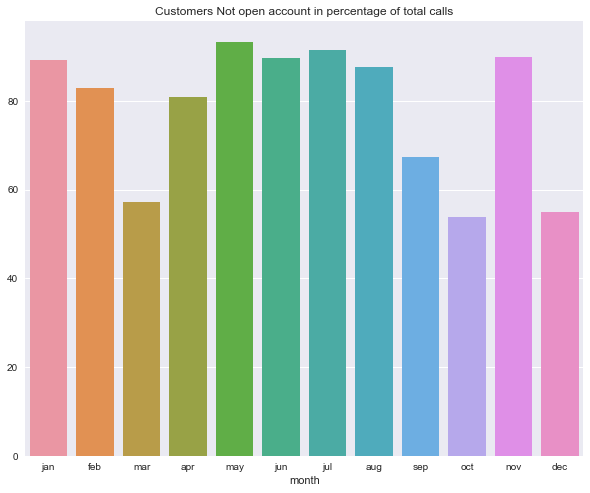

In [109]:
bnk_mrktg_raw_y_as_no = bnk_mrktg_raw[bnk_mrktg_raw.y==0].groupby('month')['y'].count()
bnk_mrktg_raw_y_as_cnt = bnk_mrktg_raw.groupby('month')['y'].count()

mnth_prcnt_cnt = (bnk_mrktg_raw_y_as_no/bnk_mrktg_raw_y_as_cnt) * 100

sns.barplot( mnth_prcnt_cnt.keys(),mnth_prcnt_cnt.values
           ,order = ['jan', 'feb', 'mar', 'apr', 'may','jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], orient = 'v' )

plt.title("Customers Not open account in percentage of total calls")
plt.show()

In [20]:
# Convert categorical values to individual features for better fit our Model. 
# we are going to use One Hot Encoding. 
# We will verify which parameters validation works using corelation coeffficent at later stages. (dimensionality reduction)
# refer. http://pbpython.com/categorical-encoding.html 

# create hot encoding for below attributes.
bnk_mrktg_raw_encoded =  pd.get_dummies(bnk_mrktg_raw,columns=['education','job','housing','day','marital', \
                                                               'poutcome','default','loan','contact','month'])



In [21]:
target_val = bnk_mrktg_raw_encoded['y'] # extract prediction from dataset.
bnk_mrktg_raw_encoded = bnk_mrktg_raw_encoded.drop('y', axis=1) # drop predictor from dataset.

In [110]:
bnk_mrktg_raw_encoded.columns

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'housing_no', 'housing_yes', 'day_1',
       'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7', 'day_8', 'day_9',
       'day_10', 'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16',
       'day_17', 'day_18', 'day_19', 'day_20', 'day_21', 'day_22', 'day_23',
       'day_24', 'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_30',
       'day_31', 'marital_divorced', 'marital_married', 'marital_single',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'default_no', 'default_yes', 'loan_no', 'loan_yes',
       'contact_cellular', 'contact_

In [112]:
from pandas.core import datetools
import statsmodels.api as sm
from scipy import stats
#stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

logit = sm.Logit(target_val, bnk_mrktg_raw_encoded)

result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.234827
         Iterations 12


In [111]:
result.summary()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/base/model.py:1029: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 4521
Model:                          Logit   Df Residuals:                     4449
Method:                           MLE   Df Model:                           71
Date:                Sat, 24 Mar 2018   Pseudo R-squ.:                  0.3428
Time:                        19:08:47   Log-Likelihood:                -1061.7
converged:                       True   LL-Null:                       -1615.5
                                        LLR p-value:                7.957e-186
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                    -0.0053      0.007     -0.733      0.464      -0.019       0.009
balance              -4.74e-06   1.79e-05     -0.264      0.792   -3.99e-05    3.04e-05
duration                0.0043      0.000     20.758      0.000       0.004       0.005
campaign               -0.0764      0.029     -2.651      0.008      -0.133      -0.020
pdays                   0.0001      0.001      0.116      0.908      -0.002       0.002
previous               -0.0188      0.040     -0.472      0.637      -0.097       0.059
education_primary      -0.3757   3.24e+06  -1.16e-07      1.000   -6.34e+06    6.34e+06
education_secondary    -0.3220   3.47e+06  -9.27e-08      1.000   -6.81e+06    6.81e+06
education_tertiary     -0.1045   3.28e+06  -3.18e-08      1.000   -6.44e+06    6.44e+06
education_unknown      -0.7881   3.57e+06  -2.21e-07      1.000   -6.99e+06    6.99e+06
job_admin.             -0.1038    4.1e+06  -2.53e-08      1.000   -8.03e+06    8.03e+06
job_blue-collar        -0.4938   3.93e+06  -1.26e-07      1.000    -7.7e+06     7.7e+06
job_entrepreneur       -0.3461   3.88e+06  -8.93e-08      1.000    -7.6e+06     7.6e+06
job_housemaid          -0.5389   4.07e+06  -1.32e-07      1.000   -7.97e+06    7.97e+06
job_management         -0.1570    4.5e+06  -3.49e-08      1.000   -8.81e+06    8.81e+06
job_retired             0.5077   4.28e+06   1.19e-07      1.000   -8.38e+06    8.38e+06
job_self-employed      -0.1998      4e+06     -5e-08      1.000   -7.84e+06    7.84e+06
job_services           -0.2453   4.44e+06  -5.52e-08      1.000    -8.7e+06     8.7e+06
job_student             0.3120   3.87e+06   8.06e-08      1.000   -7.58e+06    7.58e+06
job_technician         -0.3295   4.48e+06  -7.35e-08      1.000   -8.79e+06    8.79e+06
job_unemployed         -0.8298   4.54e+06  -1.83e-07      1.000   -8.89e+06    8.89e+06
job_unknown             0.4850   4.46e+06   1.09e-07      1.000   -8.74e+06    8.74e+06
housing_no              0.0235   8.71e+06    2.7e-09      1.000   -1.71e+07    1.71e+07
housing_yes            -0.1982    9.6e+06  -2.06e-08      1.000   -1.88e+07    1.88e+07
day_1                   0.9999        nan        nan        nan         nan         nan
day_2                  -0.0223        nan        nan        nan         nan         nan
day_3                  -0.2292        nan        nan        nan         nan         nan
day_4                  -0.3866        nan        nan        nan         nan         nan
day_5                  -0.0486        nan        nan        nan         nan         nan
day_6                  -0.5089        nan        nan        nan         nan         nan
day_7                  -0.8592        nan        nan        nan         nan         nan
day_8                  -0.6072        nan        nan        nan         nan         nan
day_9                  -0.2569        nan        nan        nan         nan         nan
day_10                  0.7569        nan        nan        nan         n

In [25]:
# Previous step created more dimentions. we need to perform fetaure selection by dropping weak parameters from strong influences.
# refer: http://scikit-learn.org/stable/modules/feature_selection.html
# https://machinelearningmastery.com/feature-selection-machine-learning-python/

In [26]:
result.conf_int()

,0,1
age,-1.945728e-02,8.868139e-03
balance,-3.990369e-05,3.042387e-05
duration,3.863300e-03,4.668915e-03
campaign,-1.329655e-01,-1.992290e-02
pdays,-1.862073e-03,2.095860e-03
previous,-9.709224e-02,5.943331e-02
education_primary,-6.344082e+06,6.344081e+06
education_secondary,-6.807409e+06,6.807409e+06
education_tertiary,-6.435404e+06,6.435404e+06
education_unknown,-6.989425e+06,6.989423e+06


In [27]:
result.params

age                   -0.005295
balance               -0.000005
duration               0.004266
campaign              -0.076444
pdays                  0.000117
previous              -0.018829
education_primary     -0.375650
education_secondary   -0.321984
education_tertiary    -0.104528
education_unknown     -0.788069
job_admin.            -0.103751
job_blue-collar       -0.493777
job_entrepreneur      -0.346110
job_housemaid         -0.538891
job_management        -0.157002
job_retired            0.507674
job_self-employed     -0.199762
job_services          -0.245259
job_student            0.311950
job_technician        -0.329476
job_unemployed        -0.829834
job_unknown            0.485030
housing_no             0.023485
housing_yes           -0.198174
day_1                  0.999949
day_2                 -0.022253
day_3                 -0.229188
day_4                 -0.386557
day_5                 -0.048618
day_6                 -0.508904
                         ...   
day_28  

These values looks far off for causual eye.

Do confience intervals and p-values matter, if distrutions are normal. 

In [139]:
from sklearn.model_selection import train_test_split

# Split data to training and test
X_train, X_test, y_train, y_test = train_test_split(bnk_mrktg_raw_encoded,target_val,test_size=0.33, random_state=42)

In [146]:
logit = sm.Logit(target_val, bnk_mrktg_raw_encoded)
result = logit.fit()

y_pred_train = result.predict(X_train)
y_pred_encod_train = [ 0 if x < 0.5 else 1 for x in y_pred_train]

confusion_matrix(y_train,y_pred_encod_train)

Optimization terminated successfully.
         Current function value: 0.234827
         Iterations 12


array([[2609,   57],
       [ 232,  131]])

In [149]:
y_pred_test = result.predict(X_test)

y_pred_encod_test = [ 0 if x < 0.5 else 1 for x in y_pred_test]

confusion_matrix(y_test,y_pred_encod_test)

array([[1301,   33],
       [ 104,   54]])

<b> Type I error : 33 <br>
Type II error : 104 </b>

In [150]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_encod_test)

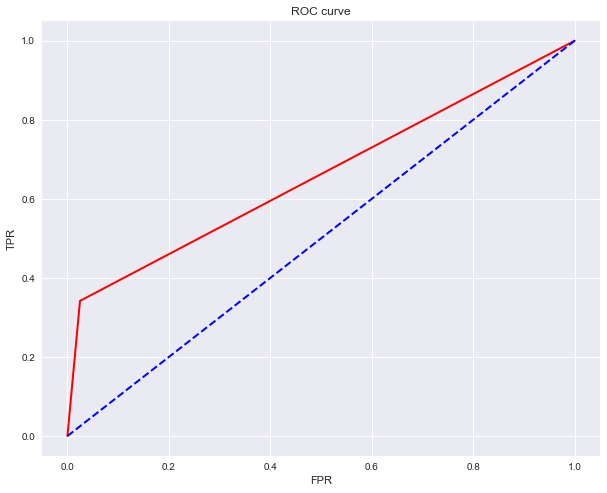

In [151]:
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [152]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.6633471239064013

In [154]:
roc_auc_score(y_train, y_pred_encod_train)

0.6697505988067265

In [37]:
#TODO: AT later point 

# from sklearn.model_selection import RepeatedKFold
# rkf = RepeatedKFold(n_splits=4, n_repeats=2, random_state=12883823)
# for train_index,test_index in rkf.split(bnk_mrktg_raw_encoded):
# print(train_index)
# print(test_index)
# #X_train,  X_test = bnk_mrktg_raw_encoded.iloc[train_index],target_val[test_index] 
# #y_train,  y_test = bnk_mrktg_raw_encoded.iloc[train_index],target_val[test_index]


In [73]:
from sklearn import grid_search, cross_validation

# Run Grid search for C value with cross validation.
gs = grid_search.GridSearchCV(
estimator=LogisticRegression(), \
        param_grid={'C': [10**-i for i in range(-5, 5)]}, \
        cv=cross_validation.KFold(n=len(X_train), n_folds=10))

# fit grid search instance with train data.
gs.fit(X_train,y_train)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=3029, n_folds=10, shuffle=False, random_state=None),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [74]:
gs.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
# grid search with cross validation returns retunrs c = 1 as best estimater.

In [155]:
clf = LogisticRegression(penalty='l1', C=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Coefficient of each feature: [[-1.13410822e-03 -2.81081153e-05  4.51968139e-03 -7.06172406e-02
  -3.85546813e-04 -1.32281239e-02 -1.45342409e-01  0.00000000e+00
   3.06054727e-01 -5.08673757e-01  6.75147616e-02 -2.88726194e-01
  -6.34416395e-01  0.00000000e+00  5.84666062e-02  7.28745572e-01
   0.00000000e+00 -1.61623543e-01  6.85584523e-01  0.00000000e+00
  -5.44946739e-01  0.00000000e+00  0.00000000e+00 -2.06769648e-01
   8.01172931e-01  1.19067275e-01  0.00000000e+00 -1.01362637e+00
   2.80145639e-02 -1.70827162e-01 -5.26495389e-01 -1.02206473e-01
  -7.84305557e-01  2.12678558e-01 -3.05087403e-01  2.55250243e-01
   2.56993598e-01 -1.04978182e-01  0.00000000e+00  1.52193607e-01
  -5.06159611e-01  3.15126455e-01 -5.94767152e-01 -2.83442329e-01
   2.29125302e-01  2.28234832e-01  0.00000000e+00  0.00000000e+00
   3.41614418e-01  0.00000000e+00  2.40709240e-01  0.00000000e+00
  -4.08407182e-01  4.94614224e-01 -1.19520184e+00  0.00000000e+00
  -3.08349057e-01 -1.93262860e-01 -6.18637024e-

In [156]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.660557379538079